In [1]:
import pyshark
import nest_asyncio
nest_asyncio.apply()
import matplotlib.pyplot as plt

In [2]:
pcap_480p = pyshark.FileCapture("Saran_yt/youtube_480_v6.pcap")
pcap_720p = pyshark.FileCapture("Saran_yt/youtube_720.pcap")
pcap_1080p = pyshark.FileCapture("Saran_yt/youtube_1080.pcap")
pcap_2k = pyshark.FileCapture("Saran_yt/youtube_2k.pcap")
pcap_4k = pyshark.FileCapture("Saran_yt/youtube_4k.pcap")

In [3]:
def get_dict(capture):

    #get src_ip
    src_ip = "_"
    for pp in capture:
        if "dns" in pp and "ip" in pp :
            src_ip = pp.ip.src
            break
        elif "dns" in pp and "ipv6" in pp:
            src_ip = pp.ipv6.src
            break

    # extract uplink and downlink packets
    uplink_packs=[]
    downlink_packs=[]
    for pp in capture:
        if("ip" in pp ):
            if pp.ip.src == src_ip:
                uplink_packs.append(pp)
            if pp.ip.dst == src_ip:
                downlink_packs.append(pp)
        if("ipv6" in pp ):
            if pp.ipv6.src == src_ip:
                uplink_packs.append(pp)
            if pp.ipv6.dst == src_ip:
                downlink_packs.append(pp)
    
    maxval=60 # time axis till 60s

    
    up_pps = {num / 10: 0 for num in range(int((maxval + 0.1) * 10))}
    up_kbps = {num / 10: 0 for num in range(int((maxval + 0.1) * 10))}
    down_pps = {num / 10: 0 for num in range(int((maxval + 0.1) * 10))}
    down_kbps = {num / 10: 0 for num in range(int((maxval + 0.1) * 10))}
    
    #uplink pps and KBps data
    for pp in uplink_packs:
        ts = float(pp.frame_info.time_relative) 
        k=int(ts*10)/10
        if k in up_pps:
            up_pps[k]+=10
        else:
            up_pps[k]=10
        if k in up_kbps:
            up_kbps[k]+=(int(pp.length)/100)
        else:
            up_kbps[k]=int(pp.length)/100
    
    #downlink pps and KBps data
    for pp in downlink_packs:
        ts = float(pp.frame_info.time_relative) 
        k=int(ts*10)/10
        if k in down_pps:
            down_pps[k]+=10
        else:
            down_pps[k]=10
        if k in down_kbps:
            down_kbps[k]+=(int(pp.length)/100)
        else:
            down_kbps[k]=int(pp.length)/100
            
    return up_pps,up_kbps,down_pps,down_kbps
    

In [4]:
up_pps_480p,up_kbps_480p,down_pps_480p,down_kbps_480p = get_dict(pcap_480p)
up_pps_720p,up_kbps_720p,down_pps_720p,down_kbps_720p = get_dict(pcap_720p)
up_pps_1080p,up_kbps_1080p,down_pps_1080p,down_kbps_1080p = get_dict(pcap_1080p)
up_pps_2k,up_kbps_2k,down_pps_2k,down_kbps_2k = get_dict(pcap_2k)
up_pps_4k,up_kbps_4k,down_pps_4k,down_kbps_4k = get_dict(pcap_4k)

# xx = list(up_pps_480p.keys())
# yy = list(up_pps_480p.values())
# plt.figure(figsize=(15, 4))
# plt.plot(xx, yy, linestyle='-')
# plt.xlabel('Time (sec)')
# plt.ylabel('Packets per Second')
# plt.title('shash4k UpLink pps',fontweight='bold')
# plt.show()

# xx = list(up_kbps_480p.keys())
# yy = list(up_kbps_480p.values())
# plt.figure(figsize=(15, 4))
# plt.plot(xx, yy, linestyle='-')
# plt.xlabel('Time (sec)')
# plt.ylabel('Packets per Second')
# plt.title('shash4k UpLink KBps',fontweight='bold')
# plt.show()


In [5]:
# # up_pps_480p
# # up_pps_720p
# # up_pps_1080p
# # up_pps_2k
# # up_pps_4k

# fig, axs = plt.subplots(5, 1, figsize=(15, 20))

# # Plot each dictionary as a subgraph
# axs[0].plot(up_pps_480p.keys(), up_pps_480p.values())
# axs[0].set_title('480p')
# axs[0].set_xlabel('Seconds')
# axs[0].set_ylabel('Pps')

# axs[1].plot(up_pps_720p.keys(), up_pps_720p.values())
# axs[1].set_title('720p')
# axs[1].set_xlabel('Seconds')
# axs[1].set_ylabel('Pps')

# axs[2].plot(up_pps_1080p.keys(), up_pps_1080p.values())
# axs[2].set_title('1080p')
# axs[2].set_xlabel('Seconds')
# axs[2].set_ylabel('Pps')

# axs[3].plot(up_pps_2k.keys(), up_pps_2k.values())
# axs[3].set_title('2k')
# axs[3].set_xlabel('Seconds')
# axs[3].set_ylabel('Pps')

# axs[4].plot(up_pps_4k.keys(), up_pps_4k.values())
# axs[4].set_title('4k')
# axs[4].set_xlabel('Seconds')
# axs[4].set_ylabel('Pps')

# fig.suptitle('UPLINK Packets per second\n\n')

# plt.tight_layout()
# plt.show()

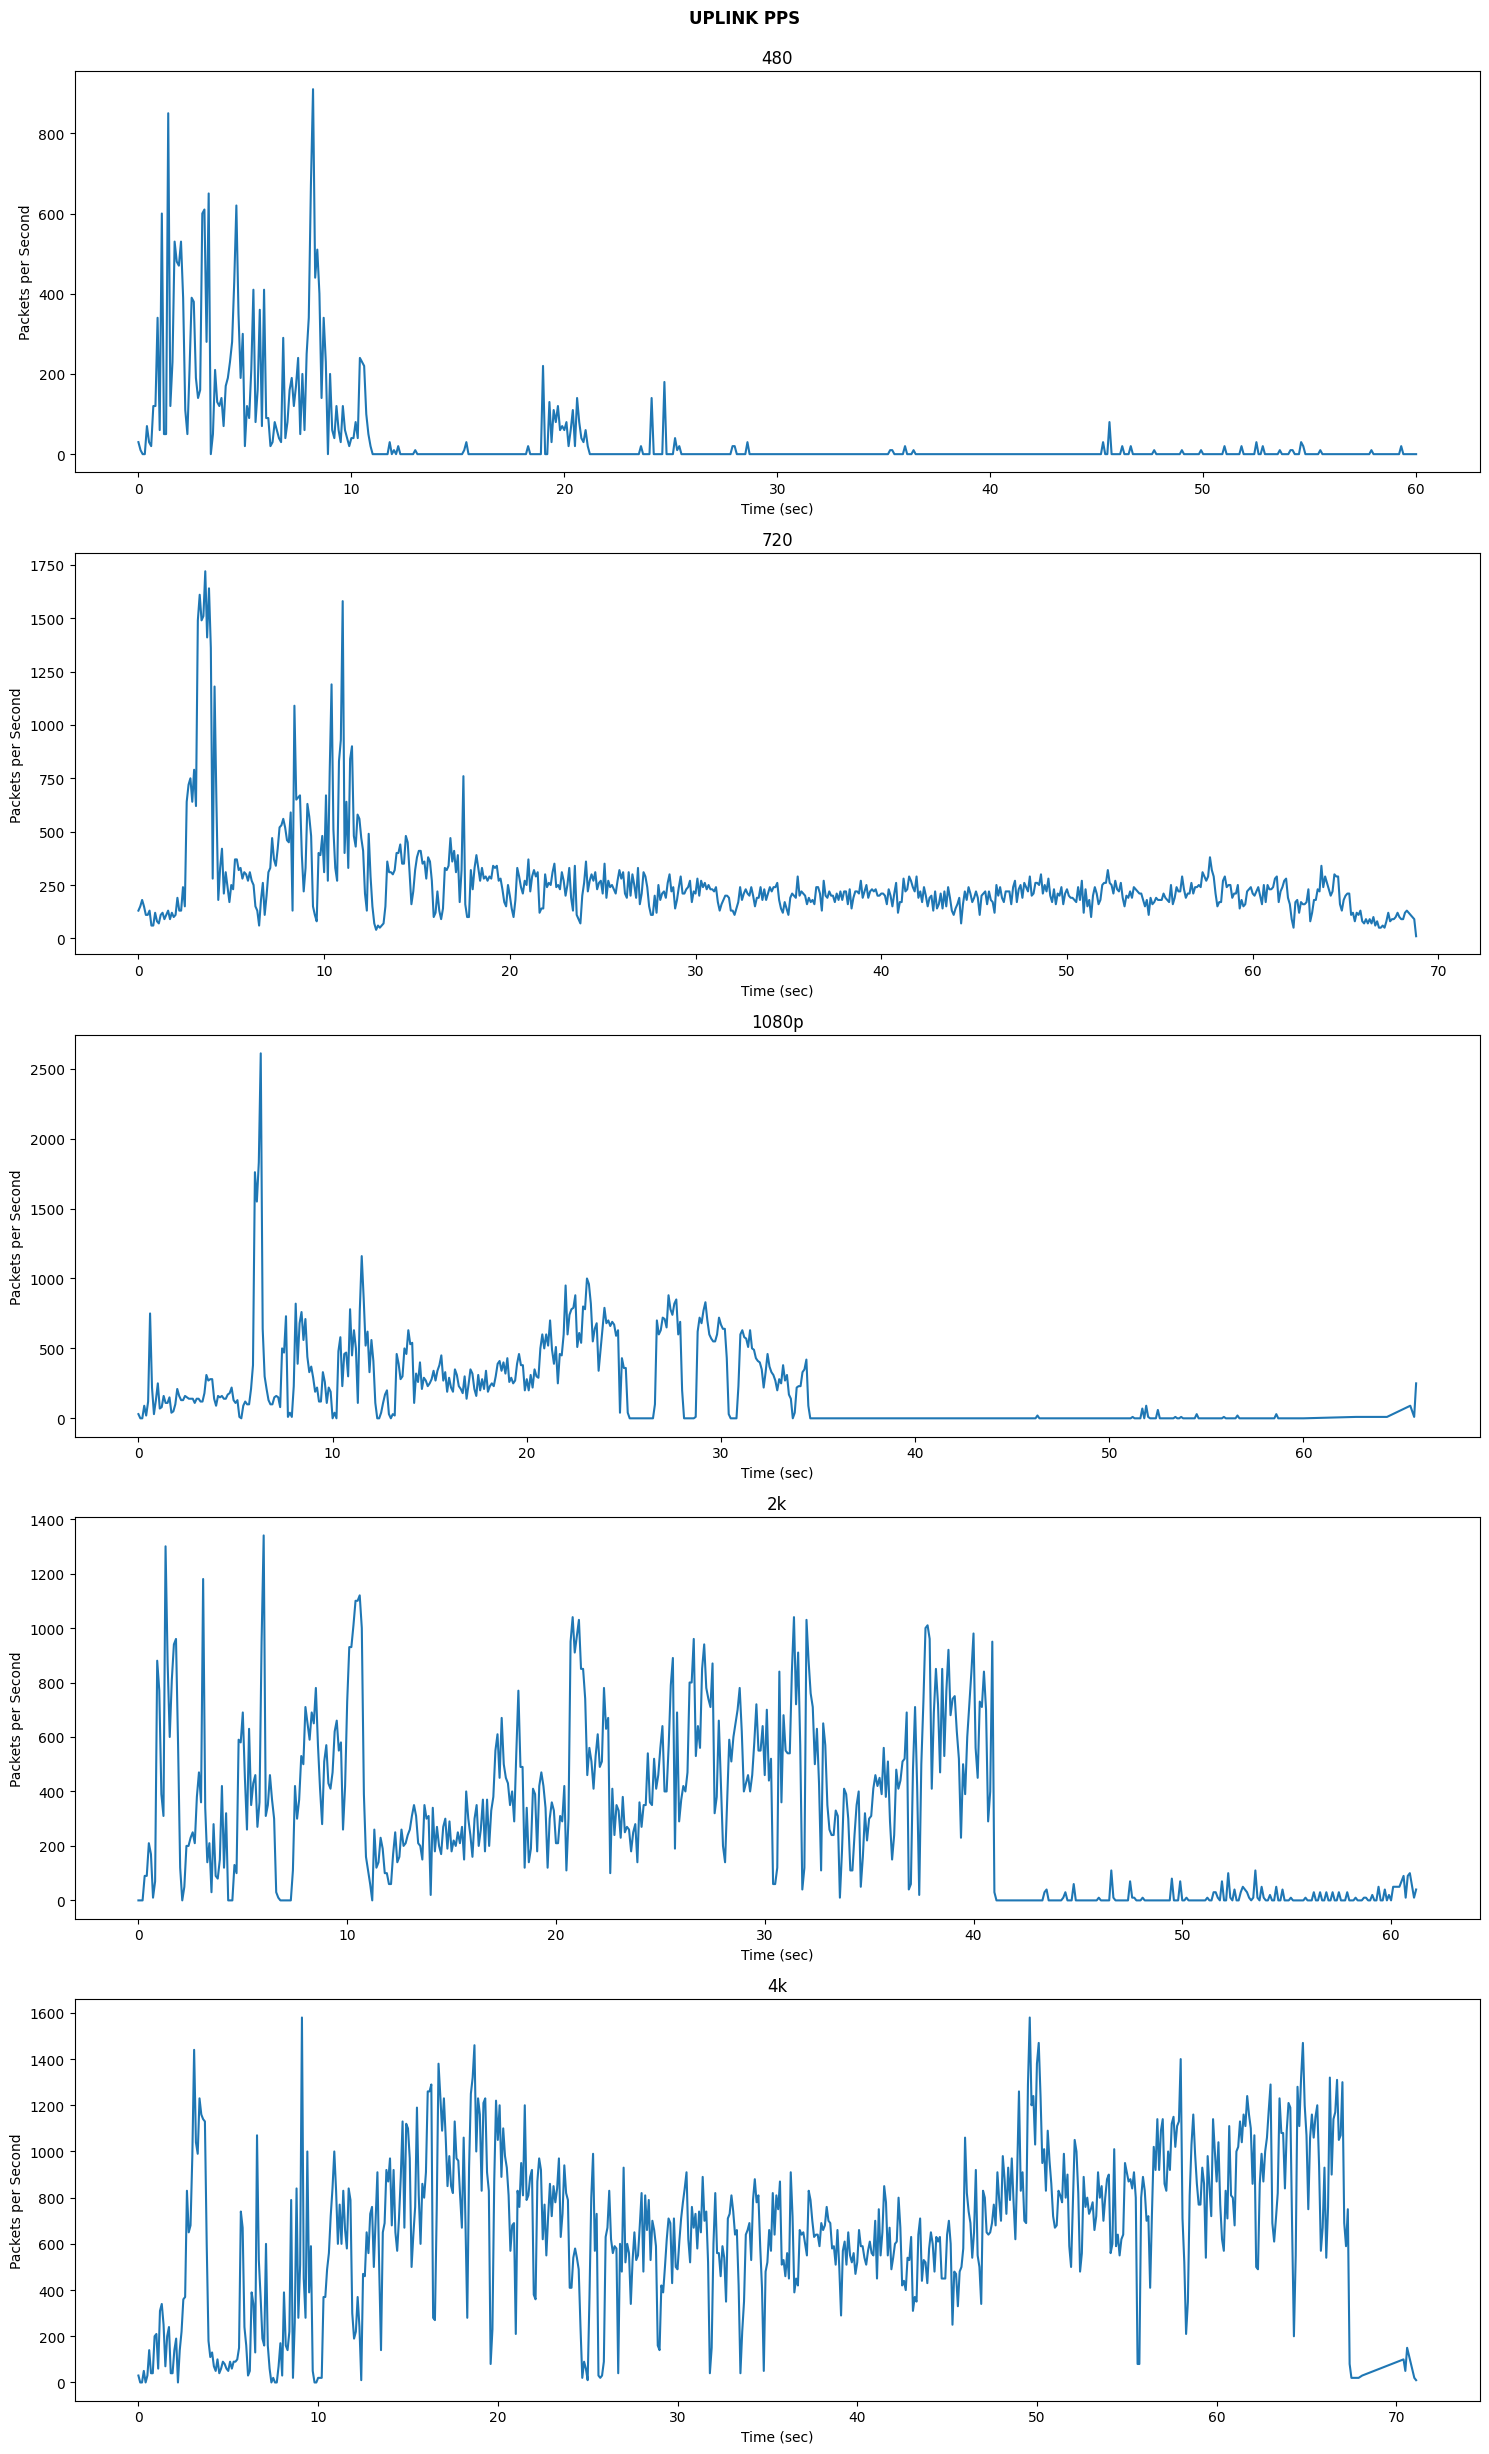

In [6]:
#plotting uplink pps

fig, axs = plt.subplots(5, 1, figsize=(15, 25))  # 5 rows, 1 column

for ax, data, name in zip(axs, [up_pps_480p, up_pps_720p, up_pps_1080p, up_pps_2k, up_pps_4k], ['480', '720', '1080p', '2k', '4k']):
    ax.plot(list(data.keys()), list(data.values()))  # Plot as line graph with markers
    ax.set_title(name)
    ax.set_xlabel('Time (sec)')
    ax.set_ylabel('Packets per Second')

fig.suptitle('UPLINK PPS\n\n',fontweight='bold')

plt.tight_layout()
plt.show()

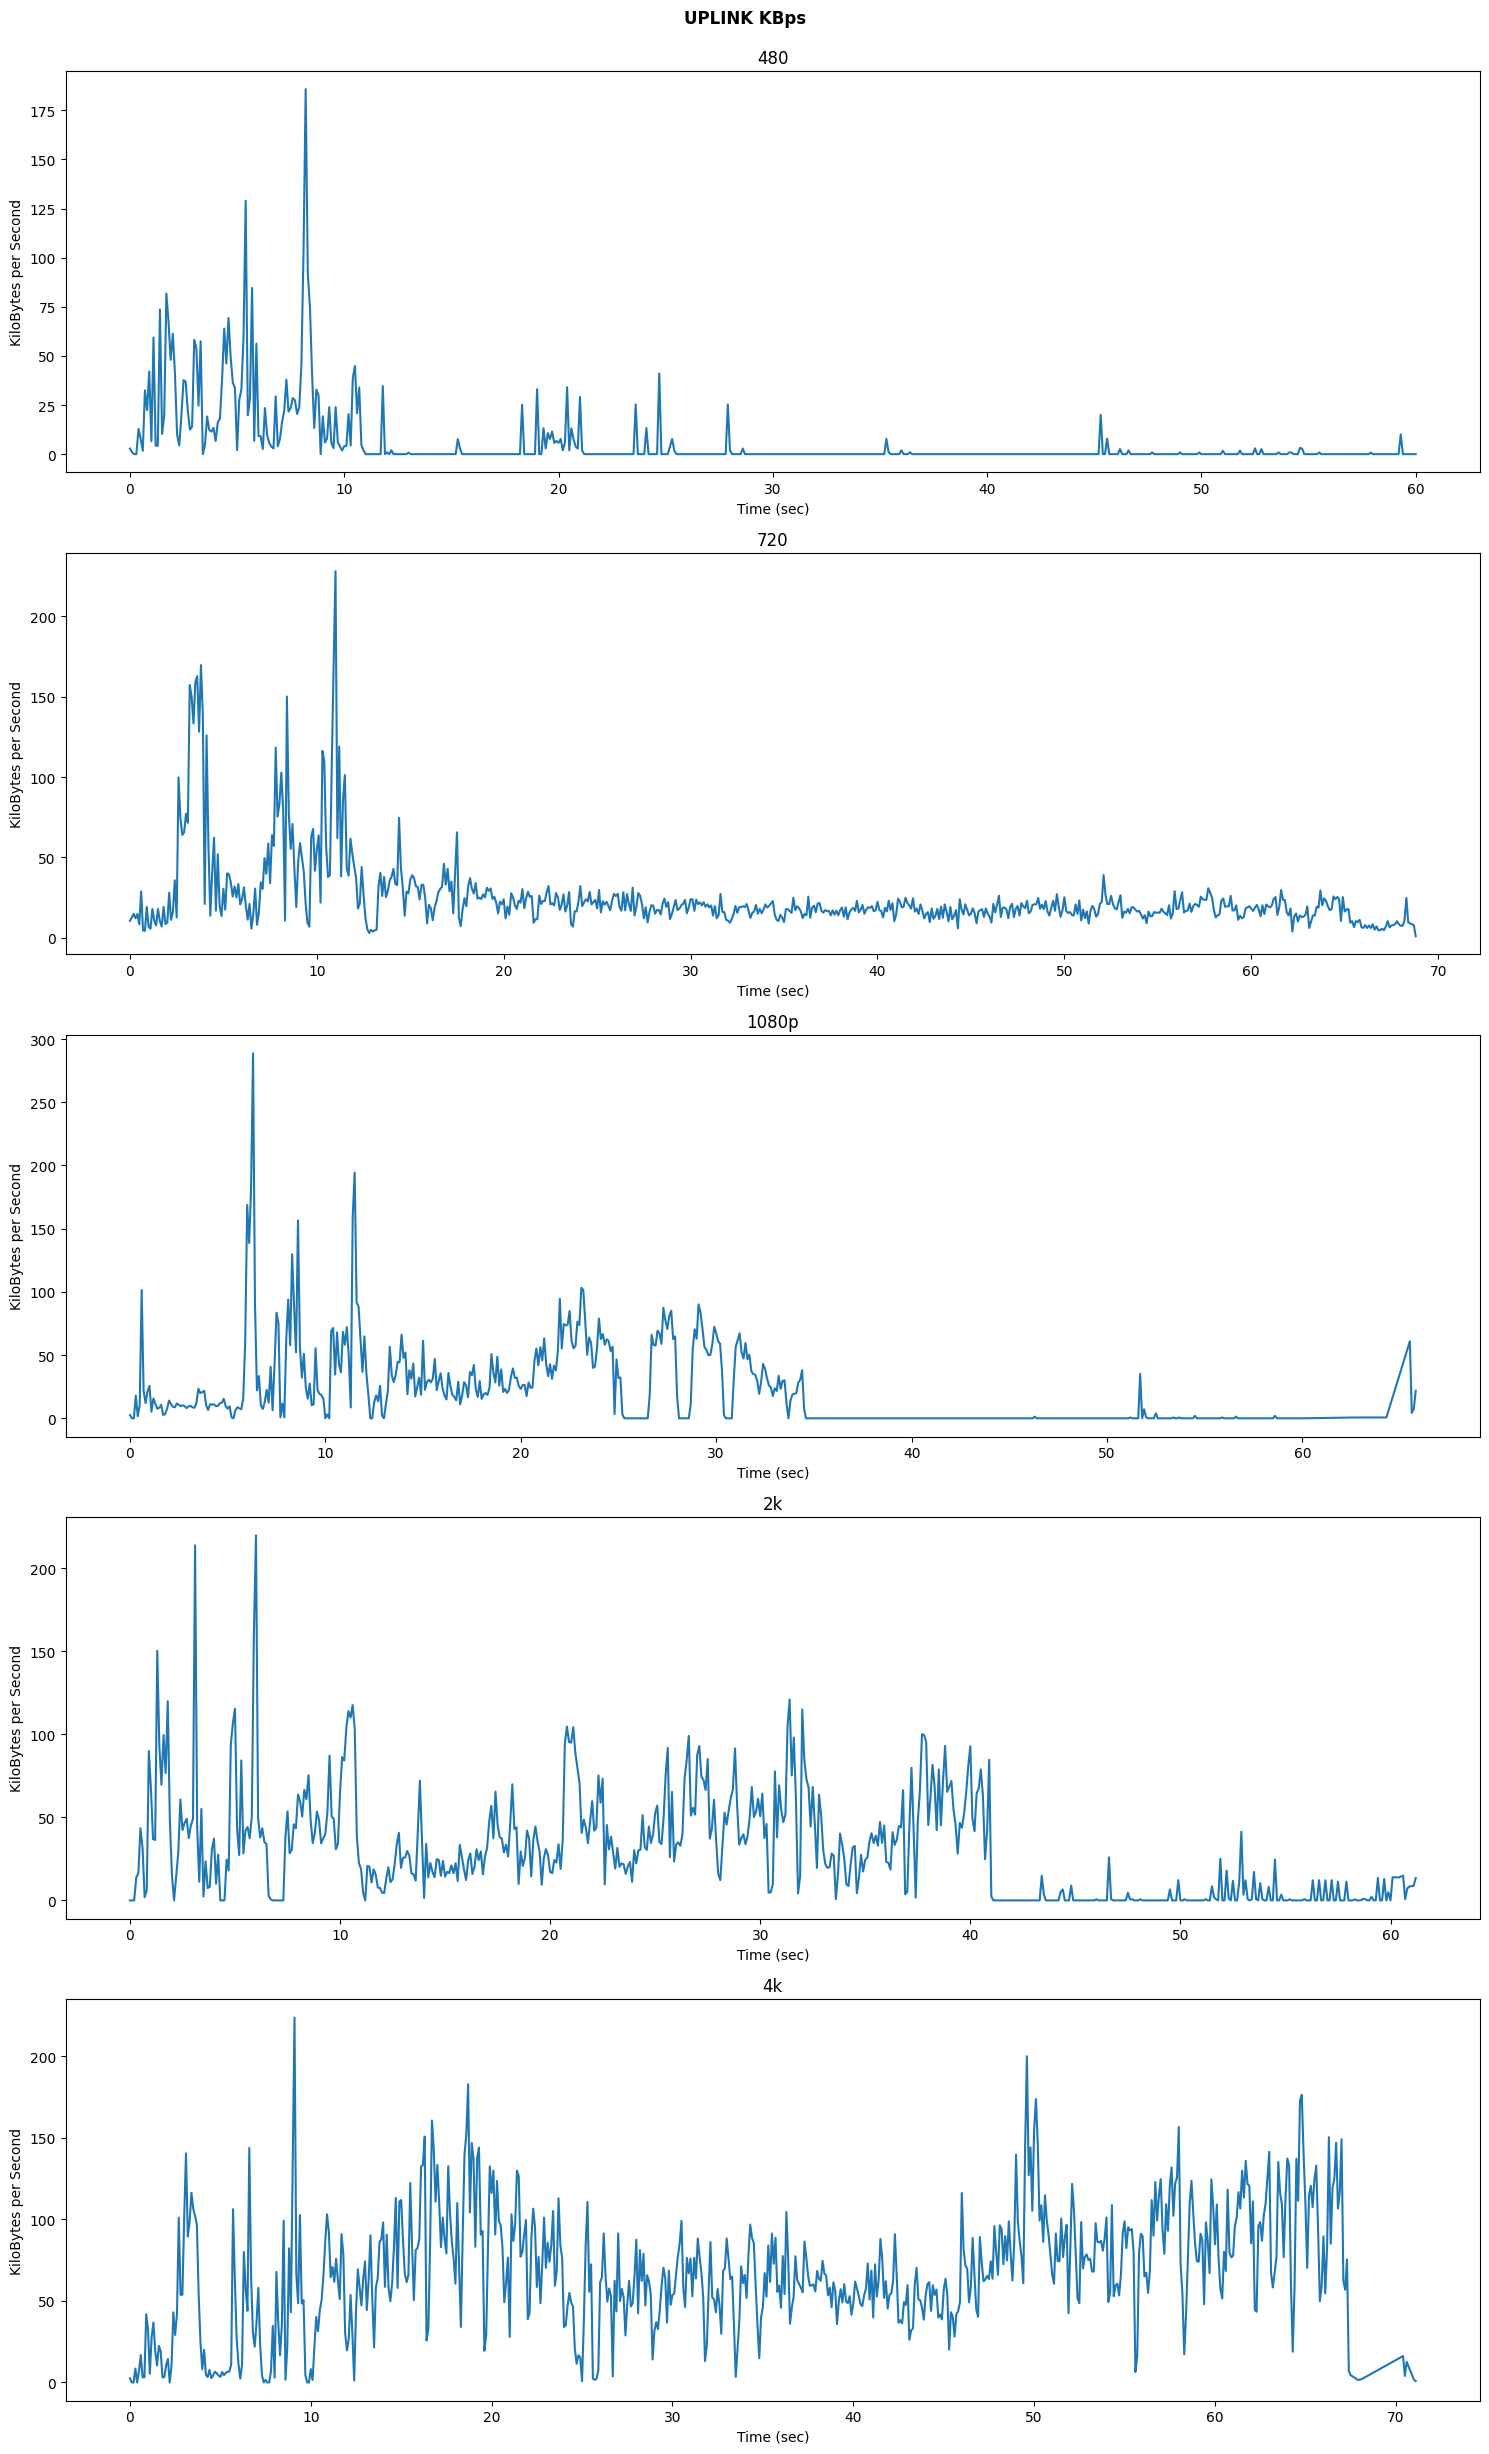

In [7]:
#plotting uplink kbps

fig, axs = plt.subplots(5, 1, figsize=(15, 25))  # 5 rows, 1 column

for ax, data, name in zip(axs, [up_kbps_480p, up_kbps_720p, up_kbps_1080p, up_kbps_2k, up_kbps_4k], ['480', '720', '1080p', '2k', '4k']):
    ax.plot(list(data.keys()), list(data.values()))  # Plot as line graph with markers
    ax.set_title(name)
    ax.set_xlabel('Time (sec)')
    ax.set_ylabel('KiloBytes per Second')

fig.suptitle('UPLINK KBps\n\n',fontweight='bold')

plt.tight_layout()
plt.show()

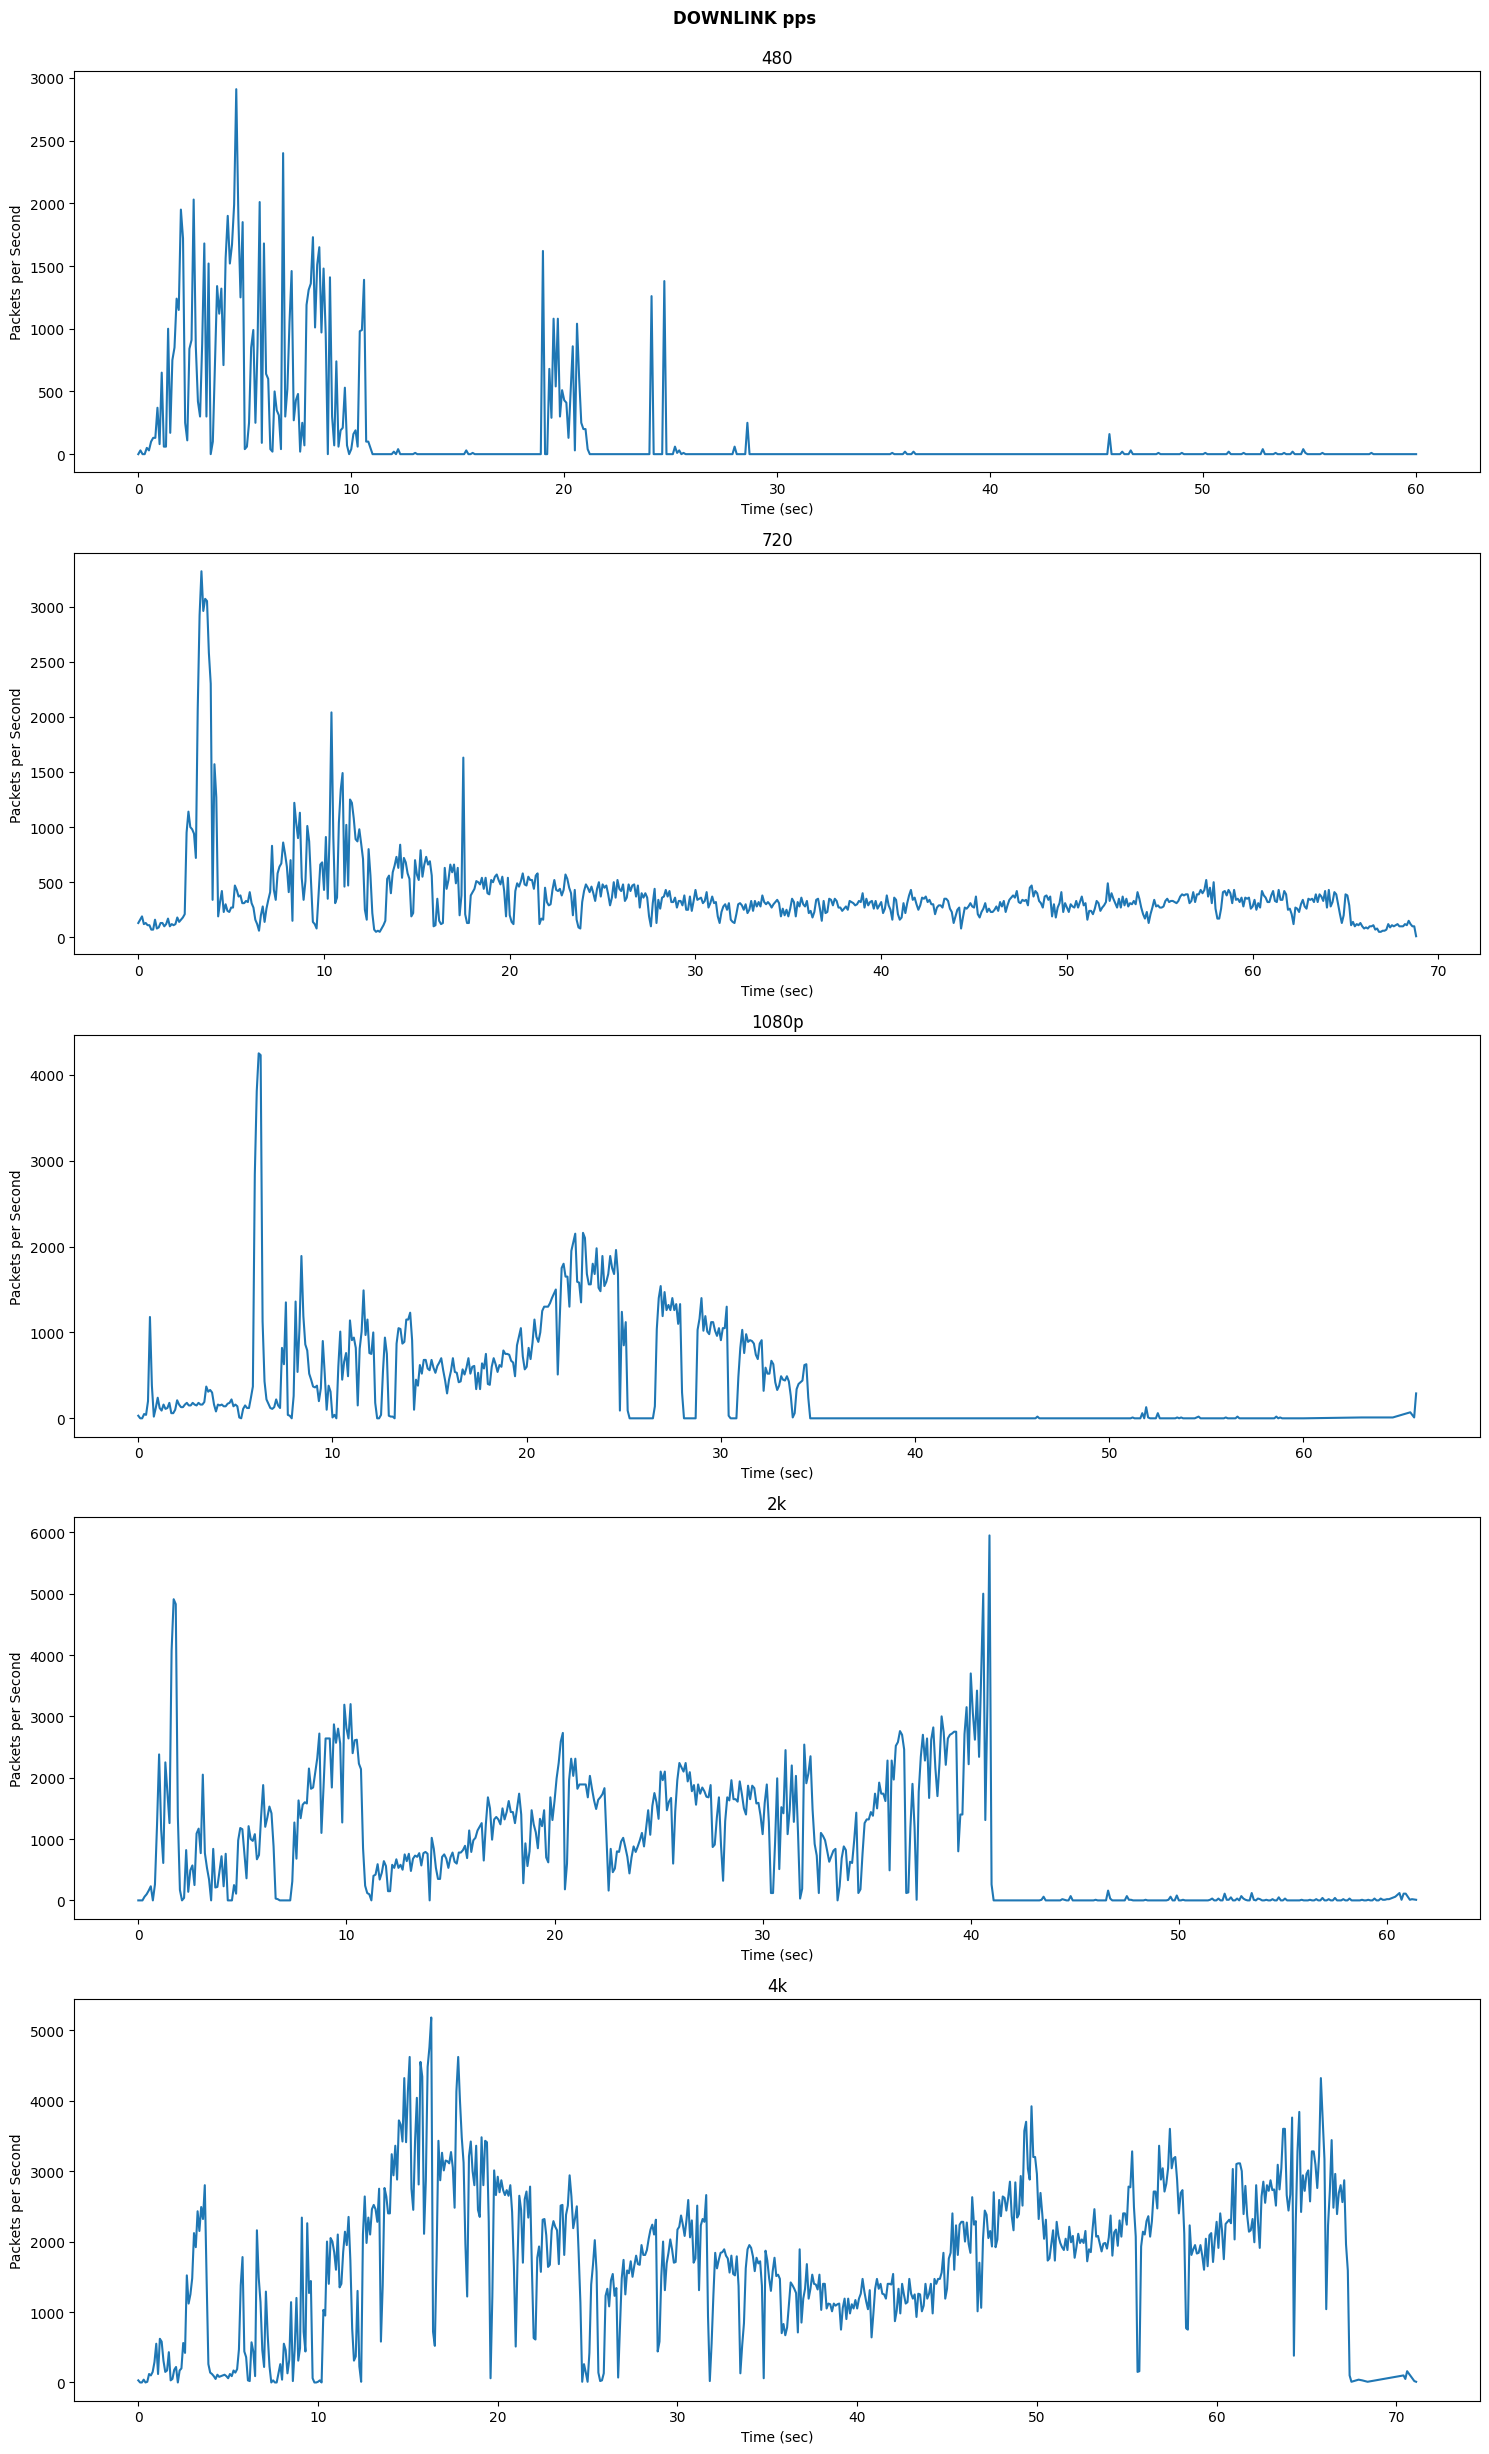

In [8]:
#plotting downlink pps

fig, axs = plt.subplots(5, 1, figsize=(15, 25))  # 5 rows, 1 column

for ax, data, name in zip(axs, [down_pps_480p, down_pps_720p, down_pps_1080p, down_pps_2k, down_pps_4k], ['480', '720', '1080p', '2k', '4k']):
    ax.plot(list(data.keys()), list(data.values()))  # Plot as line graph with markers
    ax.set_title(name)
    ax.set_xlabel('Time (sec)')
    ax.set_ylabel('Packets per Second')

fig.suptitle('DOWNLINK pps\n\n',fontweight='bold')

plt.tight_layout()
plt.show()

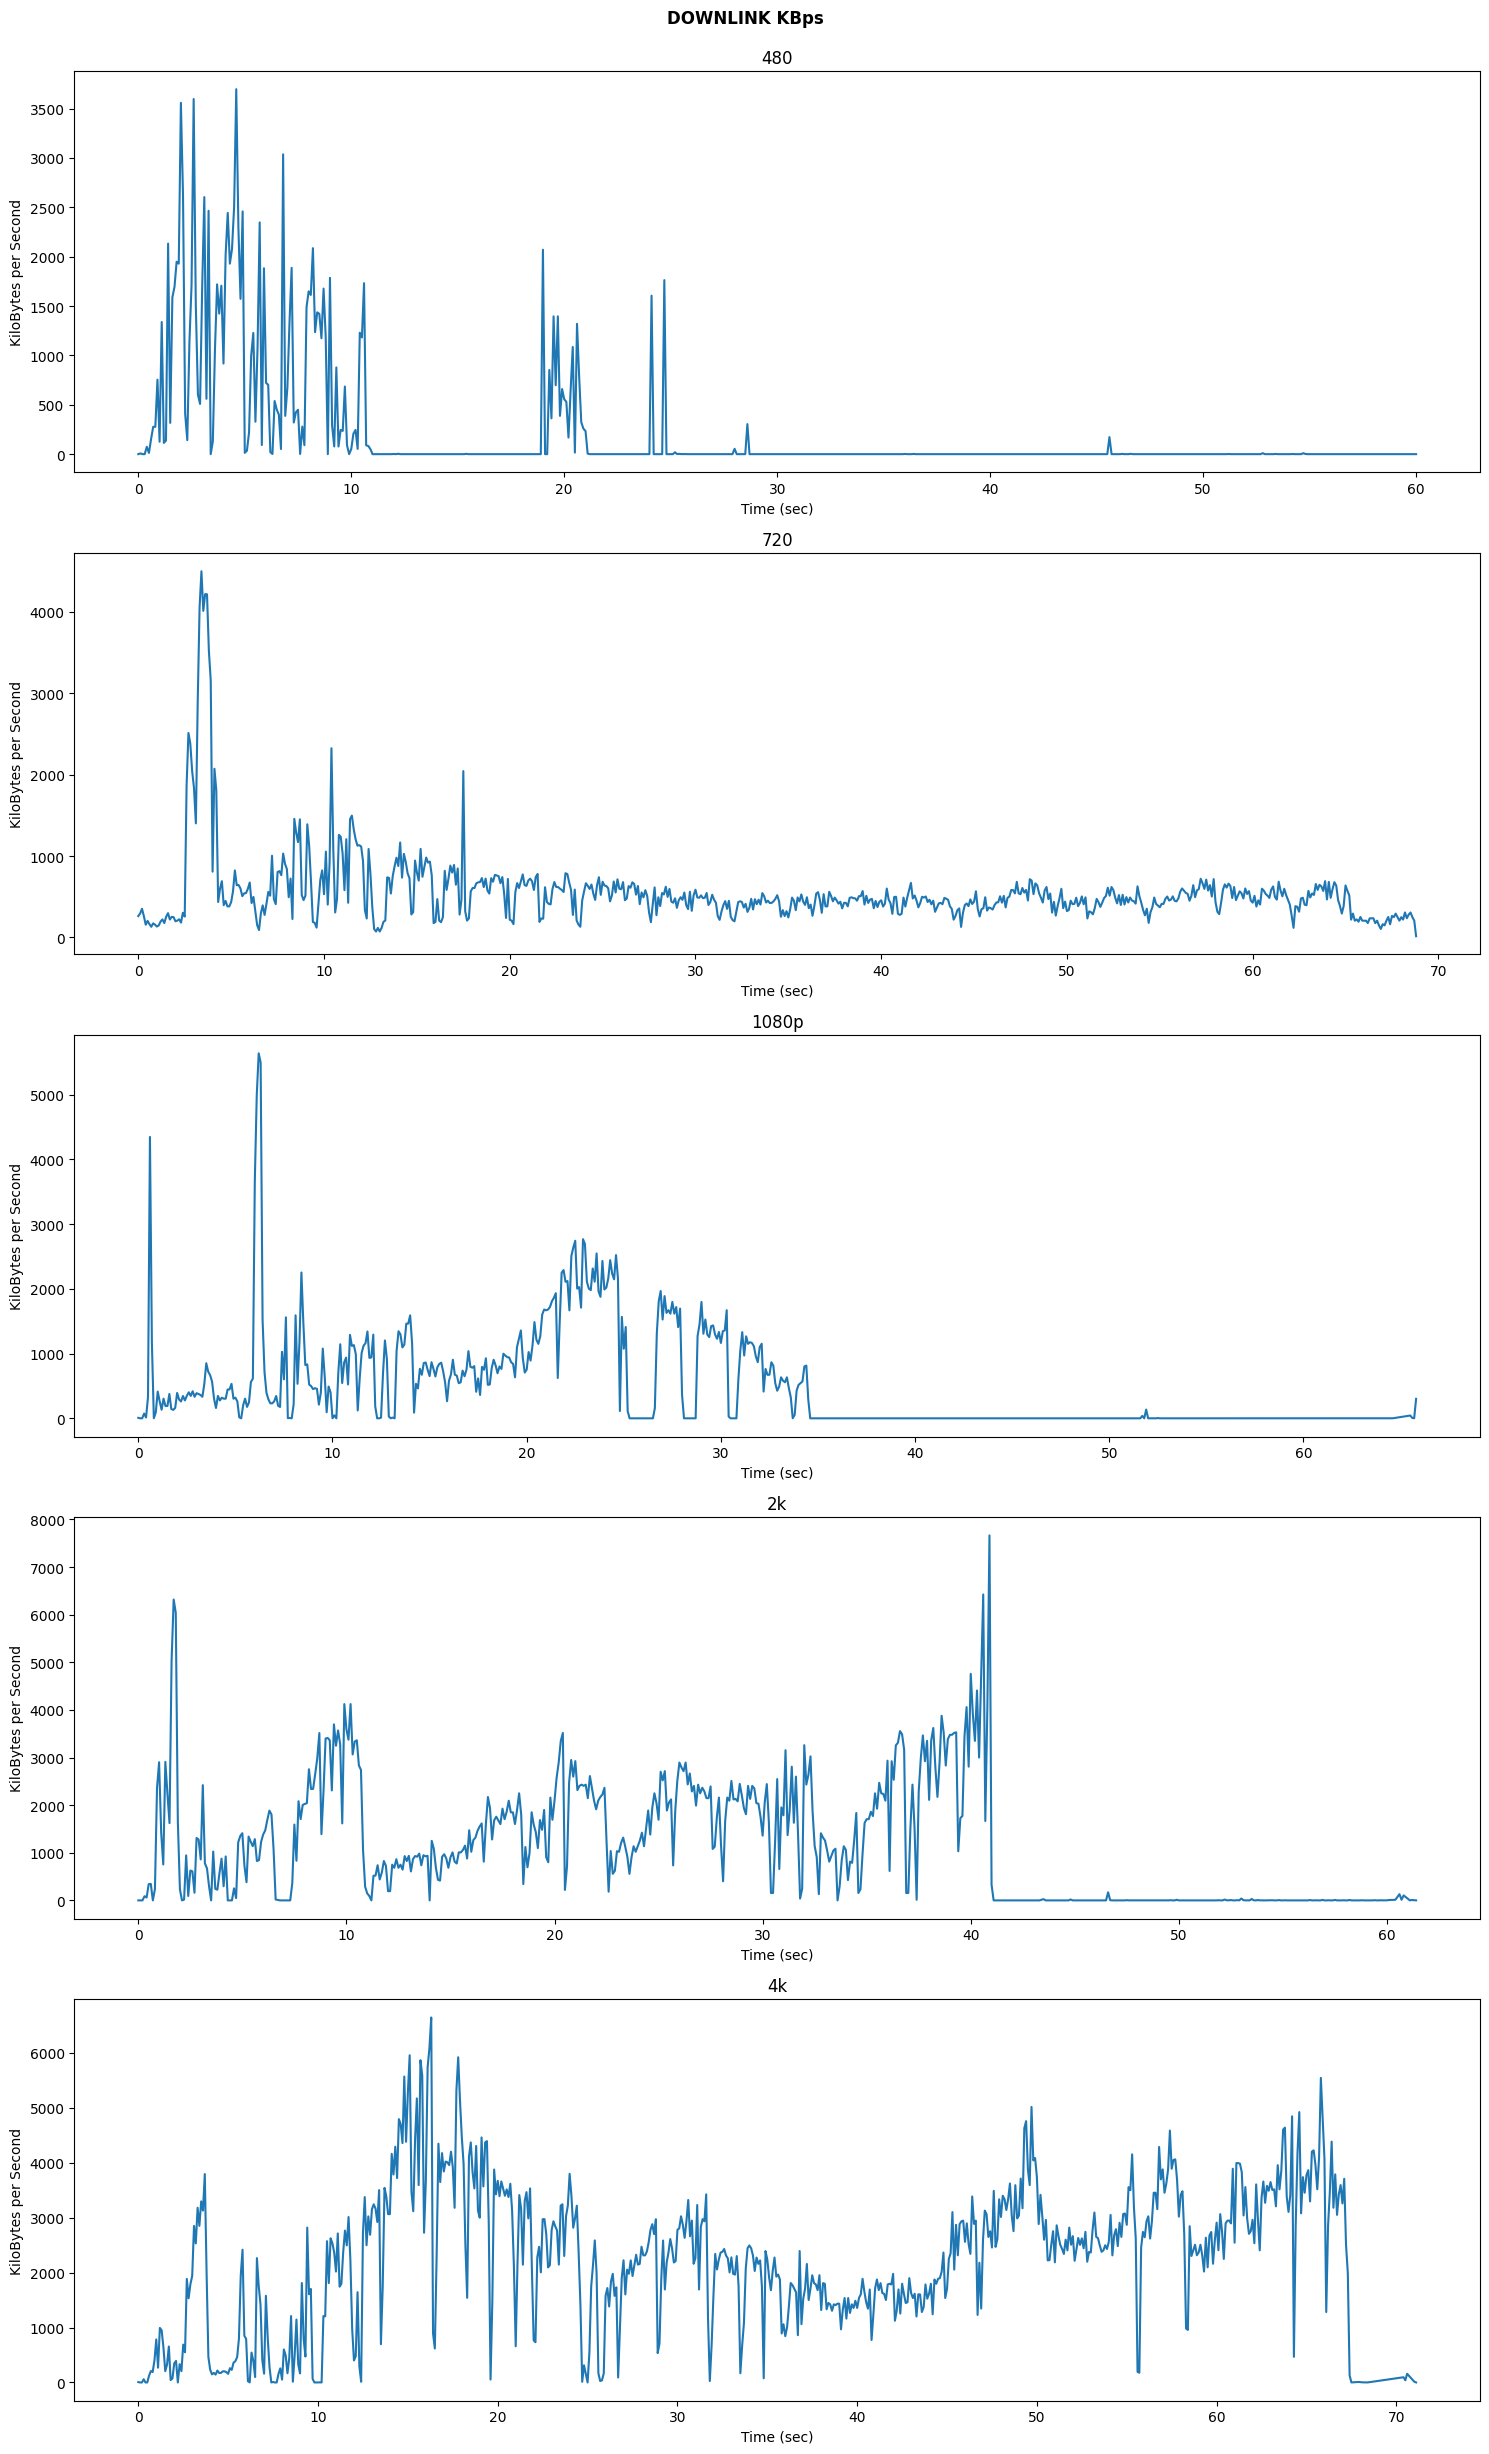

In [9]:
#plotting DownLink kbps

fig, axs = plt.subplots(5, 1, figsize=(15, 25))  # 5 rows, 1 column

for ax, data, name in zip(axs, [down_kbps_480p, down_kbps_720p, down_kbps_1080p, down_kbps_2k, down_kbps_4k], ['480', '720', '1080p', '2k', '4k']):
    ax.plot(list(data.keys()), list(data.values()))  # Plot as line graph with markers
    ax.set_title(name)
    ax.set_xlabel('Time (sec)')
    ax.set_ylabel('KiloBytes per Second')

fig.suptitle('DOWNLINK KBps\n\n',fontweight='bold')

plt.tight_layout()
plt.show()